In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plnn.dataset import get_dataloaders

from plnn.data_generation.signals import get_sigmoid_function
from cont.binary_flip import get_binary_flip_curves

In [2]:
DATDIR = "../data/training_data/data_phi2_1a"
OUTDIR = "out"

datdir_train = f"{DATDIR}/training"
datdir_valid = f"{DATDIR}/validation"

def read_nsims(datdir):
    return np.genfromtxt(f"{datdir}/nsims.txt", dtype=int)

In [3]:
nsims_train = read_nsims(datdir_train)
nsims_valid = read_nsims(datdir_valid)

train_dataloader, valid_dataloader, train_dset, valid_dset = get_dataloaders(
        datdir_train, datdir_valid, nsims_train, nsims_valid, 
        batch_size_train=1, batch_size_valid=1, 
        ndims=2, dtype=np.float64, return_datasets=True,
    )

In [4]:
sigparam_set = set()

ts = np.linspace(0, 100, 20)
for inputs, outputs in train_dset:
    sigparams = inputs[-1]
    assert sigparams.shape == (2,4)
    sigparam_set.add(tuple([tuple(x) for x in sigparams]))


In [5]:
bifcurves, bifcolors = get_binary_flip_curves(add_flip_curves=True)

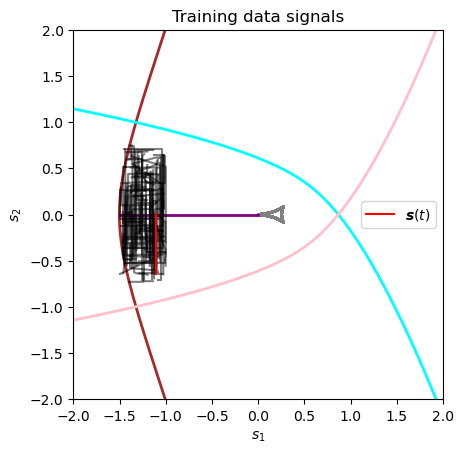

In [6]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')

for curve, color in zip(bifcurves, bifcolors):
    ax.plot(curve[:,0], curve[:,1], '-',
            color=color, linewidth=2)

for sigparam_tuple in sigparam_set:
    sigparams = np.array(sigparam_tuple)
    sigfunc = get_sigmoid_function(*sigparams.T)
    sigs = sigfunc(ts)
    l = ax.plot(sigs[:,0], sigs[:,1], 'k', alpha=0.5)

l = ax.plot(sigs[:,0], sigs[:,1], 'r', alpha=1)
ax.legend(l, ["$\\boldsymbol{s}(t)$"])

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

ax.set_title("Training data signals")
ax.set_xlabel("$s_1$")
ax.set_ylabel("$s_2$")

plt.savefig(f"{OUTDIR}/phi2_signal_coverage.png")

In [7]:
tuple(np.ones([2,3]))

(array([1., 1., 1.]), array([1., 1., 1.]))